# Multimodal Data Fusion - Exercise 4 - Bayesian Inference


In this exercise, we will take a closer look at the Bayesian framework and the basics of Bayesian inference to be needed in data fusion systems. You will be learning about prior likelihood, posterior, probabilistic models, and Bayes rule as well as applying these to parameter estimation with linear regression w/o outliers.

## Learning goals 

After completion of this exercise, you should be able to

- Understand the basic elements of Bayesian inference
- Be able to apply traditional and Bayesian methods in simple parameter estimation tasks (i.e. curve fitting)
- Apply outlier robust methods to simple parameter estimation problems
  

## Relevant lecture
Lecture 5.

## Relevant Sections in course book

Chapter 9-11

## Additional Material
* Visualization and plotting with [matplotlib](https://matplotlib.org)
* Scikit-learn page on [Linear Models](https://scikit-learn.org/stable/modules/linear_model.html)
    * Linear Regression model [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
    * Bayesian Ridge model [BayesianRidge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge)
    * RANSAC (RANdom SAmple Consensus) algorithm [RANSACRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html#sklearn.linear_model.RANSACRegressor)

## Output Hints
Below are the output plots for each method and parameter values for relevant methods

|Tutorial|Problem 1|Problem 2|  
|:-----------------------------:|:-----------------------------:|:-----------------------------:|
| <img src="./images/Fig1.png" /> | <img src="./images/Fig2.png" /> Coefficients: [  0.          12.00090089 -35.07074983  23.44153538] | <img src="./images/Fig3.png" /> Coefficients: [ 0.83622239 -1.02159909 -1.09594268  0.13723005] |
| | |Coefficients: [ -0.11091034  11.8342979  -34.66273692  23.17045428] |

|Problem 3|Problem 4|  
|:-----------------------------:|:-----------------------------:|
| <img src="./images/Fig4.png" /> Coefficients: [ 0.         -0.85965833 -5.54688612  4.6818194 ]| <img src="./images/Fig5.png" /> |
|Coefficients: [0.99528876 -0.59443356 -0.53728453 -0.36128608]| |
|Coefficients: [ 0.99528893 -0.59443379 -0.53728462 -0.36128604]| |

| | Problem 5| |
|:-----------------------------:|:-----------------------------:|:-----------------------------:|
| <img src="./images/Fig6.png" /> | <img src="./images/Fig7.png" /> |<img src="./images/Fig8.png" /> |

# Bayesian Inference: Basics

##  Introduction

Bayesian inference is a method of statistical inference in which Bayes' theorem is used to update the probability for a hypothesis as more evidence or information becomes available.

## Questions 
Define the main premise of Bayesian inference. What are its relative advantages
and disadvantages?

Ans: (optional)

# Parameter estimation: curve fitting

<a id='KmeansDemo'></a>
<div class=" alert alert-info">
    <b>Tutorial.</b> Generate sinusoidal data with noise and bias

The code below defines a function for generating sinusoidal data with noise and generate random data points for x-axis and y-axis. Complete and run the code below to visualize the data.
<p>1) Define our sinusoidal function </p>
<p>2) Generate "size" number of uniform random data points in the range of 0. and 1. for x-axis </p>
<p>3) Generate "size" number of random data points from standard normal distribution for y-axis </p>
<p>4) Make a deep copy and add outlier bias to 5 samples </p>
<p>5) Define linearly spaced vector with 100 points in the range of 0. to 1. </p>
<p>6) Plot data point without and with outliers (vectors "x" and "y/y2") </p>

</div>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats # remove if not needed?!

Answer to this block will be provided during exercise session

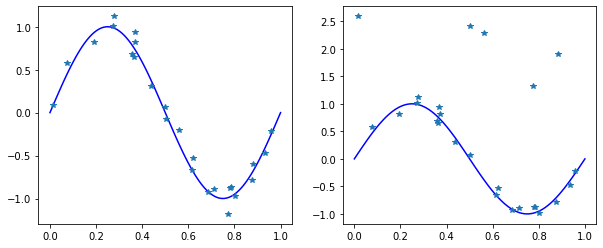

In [4]:
def func(x): return np.sin(2*np.pi*x)

size = 25

rng = np.random.RandomState(1234)
x = rng.uniform(0.,1.,size)

y = rng.normal(scale=0.1, size=size)
y = func(x) + y

bias = 2.5
y2 = np.copy(y)
y2[15:20] += bias

xt = np.linspace(0,1,100)
f = plt.figure(figsize=(10,4))
f.add_subplot(1,2,1)
plt.plot(xt, func(xt), 'b')
plt.plot(x, y, '*')

f.add_subplot(1,2,2)
plt.plot(xt, func(xt), 'b')
plt.plot(x, y2, '*')

## Linear regression

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 1

<p> Complete the code below to build and fit a linear regression model for curve fitting on sinusoidal data with noise. </p>
    
<p>1) Generate "PolynomialFeatures()" of "n_order" and fit the model to data (Hint: fit_transform())</p>
<p>2) Fit linear regression object with "X" and "y"</p>
<p>3) Print fitted linear regression model's coefficients</p>
<p>4) Predict the labels using fitted linear regression model for "Xt"</p>
<p>5) Plot data points and obtained linear regression curve</p>

</div>

Coefficients:
[  0.          12.00090089 -35.07074983  23.44153538]


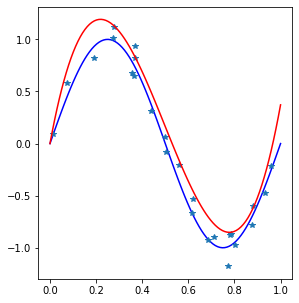

In [5]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

## == Create linear regression object == ##
lreg = linear_model.LinearRegression()
n_order = 3

x_reshaped = x.reshape(-1, 1)
xt_reshaped = xt.reshape(-1,1)

# Generate "PolynomialFeatures()" of "n_order" and fit the model to data (Hint: fit_transform())
X = PolynomialFeatures(n_order).fit_transform(x_reshaped)
Xt = PolynomialFeatures(n_order).fit_transform(xt_reshaped)
# Fit linear regression object with "X" and "y"
lreg.fit(X, y)

# Print fitted linear regression model's coefficients 
print('Coefficients:')
print(lreg.coef_)
# Predict the labels using fitted linear regression model for "Xt"
# print(reshaped_xt.shape)
ypred = lreg.predict(Xt)

f = plt.figure(figsize=(10,5))
f.add_subplot(1,2,1)
plt.plot(xt, func(xt), 'b')

# Plot data point with symbol '*'
plt.plot(x,y,'*')

# Plot obtained linear regression curve with 'r'
points=np.dot(Xt,lreg.coef_)
plt.plot(xt,points,'r')

## Bayesian linear regression

<a id='Task1.2'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 2

<p> Complete the code below to build and fit a bayesian ridge regression model for curve fitting on sinusoidal data with noise.</p>
    
<p>1) Fit bayesian linear regression object with "X" and "y" and print coefficients</p>
<p>2) Predict the labels using fitted bayesian linear regression model for "Xt" and also return the standard deviation</p>
<p>3) Plot data point and obtained bayesian linear regression curve with 95% confidence interval</p>
<p>4) Repeat step 1 to 3 with new fitted bayesian linear regression model</p>
    
Note: Plot in red shaded are the 95% confidence interval corresponding to $\pm 2$ standard deviations above mean.


</div>

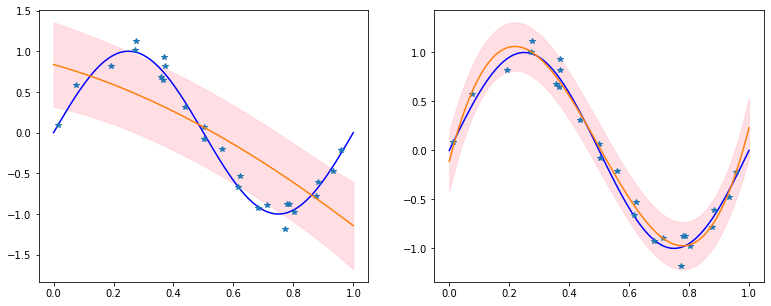

In [24]:
## == Create bayesian linear regression object == ##
breg = linear_model.BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

f = plt.figure(figsize=(13,5))

# Fit bayesian linear regression object with "X" and "y" and print coefficients
breg.fit(X,y)

# Predict the labels using fitted bayesian linear regression model for "Xt" and also return the standard deviation
ypred, ystd = breg.predict(Xt,return_std=True)

# First subplot
f.add_subplot(1,2,1)
plt.plot(xt, func(xt), 'b')

# Plot data point with symbol '*'
plt.plot(x,y,'*')

# Plot obtained bayesian linear regression curve with 'r'
plt.plot(xt,ypred)
ymean = np.mean(ypred)
plt.fill_between(xt, ypred-ystd, ypred+ystd,
                    color="pink", alpha=0.5, label="predict std")

# Set new parameters for the bayesian linear regression object
breg = linear_model.BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

breg.set_params(alpha_init=1.0, lambda_init= 1e-3) 
# Updating the initial value for alpha (precision of the noise) and 
# initial value for lambda (precision of the weights)
#f = plt.figure(figsize=(10,5))

breg.fit(X,y)

# Predict the labels using fitted bayesian linear regression model for "Xt" and also return the standard deviation
ypred, ystd = breg.predict(Xt,return_std=True)

# First subplot
f.add_subplot(1,2,2)
plt.plot(xt, func(xt), 'b')

# Plot data point with symbol '*'
plt.plot(x,y,'*')

# Plot obtained bayesian linear regression curve with 'r'
plt.plot(xt,ypred)
ymean=np.mean(ypred)
plt.fill_between(xt, ypred-2*ystd, ypred+2*ystd,
                    color="pink", alpha=0.5, label="predict std")
# Perform the steps from 1 to 3 again with new fitted bayesian linear regression model

# Robust parameter estimation: curve fitting

## Linear regression and Bayesian linear regression

<a id='Task2.1'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 3

<p> Complete the code below to build and fit linear and bayesian linear regression models for curve fitting on sinusoidal data with noise and bias</p>

<p>1) Repeat all the steps from problem 1 and 2 but this time using 'y2' (data with outliers defined in tutorial)</p>
<p>2) Compare all the results from Problem 1, 2, and 3. Explain your reasoning why models behave differently?</p>


</div>

Coefficients:
[ 0.         -0.85965833 -5.54688612  4.6818194 ]


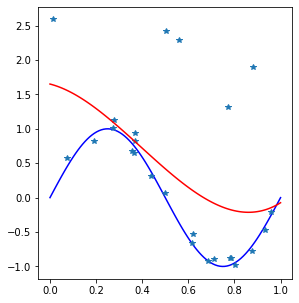

In [22]:
lreg = linear_model.LinearRegression()
n_order = 3

x_reshaped = x.reshape(-1, 1)
xt_reshaped = xt.reshape(-1,1)

# Generate "PolynomialFeatures()" of "n_order" and fit the model to data (Hint: fit_transform())
X = PolynomialFeatures(n_order).fit_transform(x_reshaped)
Xt = PolynomialFeatures(n_order).fit_transform(xt_reshaped)
# Fit linear regression object with "X" and "y"
lreg.fit(X, y2)

# Print fitted linear regression model's coefficients 
print('Coefficients:')
print(lreg.coef_)
# Predict the labels using fitted linear regression model for "Xt"
# print(reshaped_xt.shape)
ypred = lreg.predict(Xt)

f = plt.figure(figsize=(10,5))
f.add_subplot(1,2,1)
plt.plot(xt, func(xt), 'b')

# Plot data point with symbol '*'
plt.plot(x,y2,'*')

# Plot obtained linear regression curve with 'r'
# points = np.dot(Xt,lreg.coef_)
plt.plot(xt,ypred,'r')

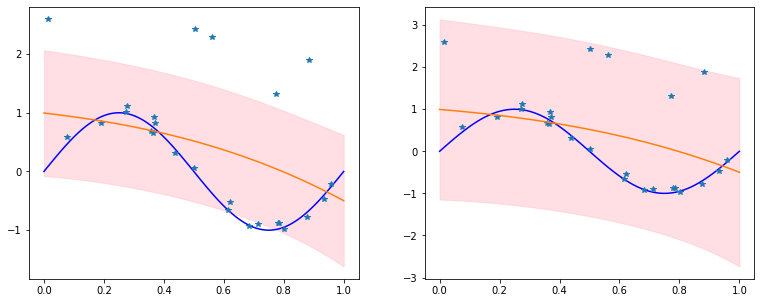

In [23]:
breg = linear_model.BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

f = plt.figure(figsize=(13,5))

# Fit bayesian linear regression object with "X" and "y" and print coefficients
breg.fit(X,y2)

# Predict the labels using fitted bayesian linear regression model for "Xt" and also return the standard deviation
ypred, ystd = breg.predict(Xt,return_std=True)

# First subplot
f.add_subplot(1,2,1)
plt.plot(xt, func(xt), 'b')

# Plot data point with symbol '*'
plt.plot(x,y2,'*')

# Plot obtained bayesian linear regression curve with 'r'
plt.plot(xt,ypred)
ymean = np.mean(ypred)
plt.fill_between(xt, ypred-ystd, ypred+ystd,
                    color="pink", alpha=0.5, label="predict std")

# Set new parameters for the bayesian linear regression object
breg = linear_model.BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

breg.set_params(alpha_init=1.0, lambda_init= 1e-3) 
# Updating the initial value for alpha (precision of the noise) and 
# initial value for lambda (precision of the weights)
#f = plt.figure(figsize=(10,5))

breg.fit(X,y2)

# Predict the labels using fitted bayesian linear regression model for "Xt" and also return the standard deviation
ypred, ystd = breg.predict(Xt,return_std=True)

# First subplot
f.add_subplot(1,2,2)
plt.plot(xt, func(xt), 'b')

# Plot data point with symbol '*'
plt.plot(x,y2,'*')

# Plot obtained bayesian linear regression curve with 'r'
plt.plot(xt,ypred)
ymean=np.mean(ypred)
plt.fill_between(xt, ypred-2*ystd, ypred+2*ystd,
                    color="pink", alpha=0.5, label="predict std")
# Perform the steps from 1 to 3 again with new fitted bayesian linear regression model

In the case of outliers, performing simple regression is not enough and we end up with an erronous regression curve. Also Bayesian regression is not capable of predicting an accurate regression curve, since it does not explicitly deal with outliers.

## RANSAC

<a id='Task2.2'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 4

<p> Complete the code below to build and fit a RANSAC model for curve fitting on sinusoidal data with noise and bias</p>
<p>2) Fit RANSAC model with "X" and "y2"</p>
<p>3) Print fitted RANSAC model's coefficients</p>
<p>4) Predict the labels using fitted RANSAC model for "Xt"</p>
<p>5) Plot data points and obtained curve</p>
<p>6) Compare this results with Problem 3. Explain your reasoning why models behave differently?</p>

</div>

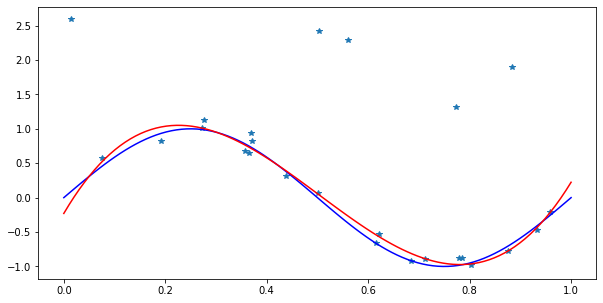

In [9]:
## == Create linear regression object using RANSACRegressor== #
ransac = linear_model.RANSACRegressor(random_state=0)
ransac.fit(X,y2)
y_preds = ransac.predict(Xt)
f = plt.figure(figsize=(10, 5))
plt.plot(x, y2, '*')
plt.plot(xt, func(xt), 'b')
plt.plot(xt, y_preds, 'r')

RANSAC performs clearly better than the previous models, by explicitly dealing with outliers. It build a consensus around the best subset of data and identifies outliers. Then, it fits only the good data and rejects the outliers.

## Gaussian Mixture Model

<a id='Task2.1'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 5

<p>Consider the data from file gmm_data.csv. 

1) Prepare scatter plot of the data where you plot the second column against the first column. 
    
2) Perform K-means clustering on data points: fit model to data and predict the cluster labels of data points. Prepare a scatter plot of data points with different colors indicating different cluster labels. 
 
3) Apply Gaussian Mixture Model with parameter covariance_type = 'full' and random_state = 100; again fit model with data and predict cluster labels. Plot data points with different colors corresponding to cluster labels. Use GMM to predict also cluster labels' posterior probabilities. 

4) Compare K means and GMM; what is their principal difference? How their outputs differ here and what might be the reason for it? </p>

</div>

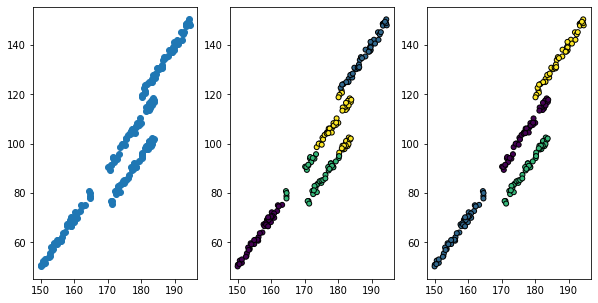

In [25]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

def kmeans_clustering(X, k=4, maximum_iterations=200):
    n, d = X.shape    # number of examples n and number of features d
    cluster_centers = np.zeros((k,d))    # Store the resulting clustering centers in the rows of this k x d matrix
    cluster_labels = np.zeros(n)    # Store here the resulting n cluster indices / labels (assigned for each example)

    k_means = KMeans(n_clusters = k, max_iter = maximum_iterations).fit(X)  # Fit k-means with k clusters and using max_iter maximum iterations
    cluster_centers = k_means.cluster_centers_  # cluster centers
    cluster_indices = k_means.labels_  # cluster label indices for each example
    return cluster_centers, cluster_indices

df = pd.read_csv("gmm_data.csv")
fig = plt.figure(figsize=(10,5))
fig.add_subplot(1, 3, 1)
plt.scatter(df.iloc[:,0], df.iloc[:,1])

cluster_means, cluster_indices = kmeans_clustering(df.iloc[:,0:2])
fig.add_subplot(1, 3, 2)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster_indices, s=25, edgecolor='k')

fig.add_subplot(1, 3, 3)
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=100)
ypred = gmm.fit_predict(df.iloc[:,0:2])
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=ypred, s=25, edgecolor='k')

KMeans cannot properly separate the clusters because it relies on the Euclidean distance. On the other hand, GMM is a method aimed at capturing also the covariance structure of the data, being able to better identify the clusters.